<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab07_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio metodos computacionales, 
# Interpolacion





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.











Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange

In [2]:
vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t 
  return 1./b * t1 * t2 - t3

In [3]:
t = np.linspace(0, 8.5, 100)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

In [4]:
dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)

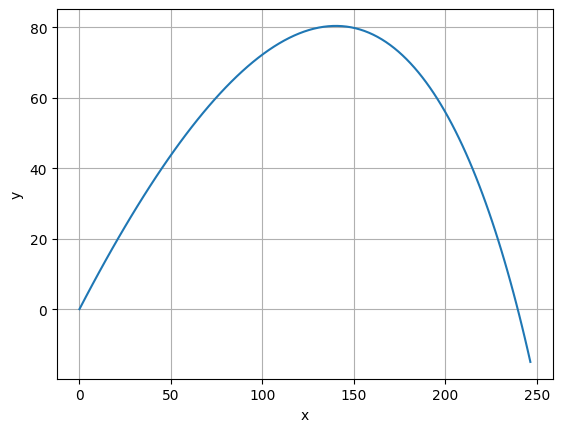

In [5]:
plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

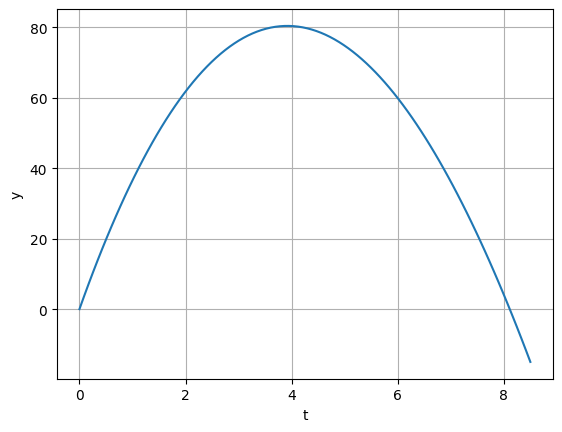

In [6]:
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

In [7]:
tv = newton(pos_y, 6.5, args=Params)
tv

8.111627022095584

In [8]:
pos_x(tv, *Params)

239.60614945520726

# Generalizacion

In [9]:
np.arange(5, 85, 5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [10]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento
theta

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

In [11]:
Rmax = np.zeros(len(theta))
for i, te in enumerate(theta):
  Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
  tv = newton(pos_y, 6.5, args = Params)
  Rmax[i] = pos_x(tv, *Params)
  #print(tv,pos_x(tv, *Params))

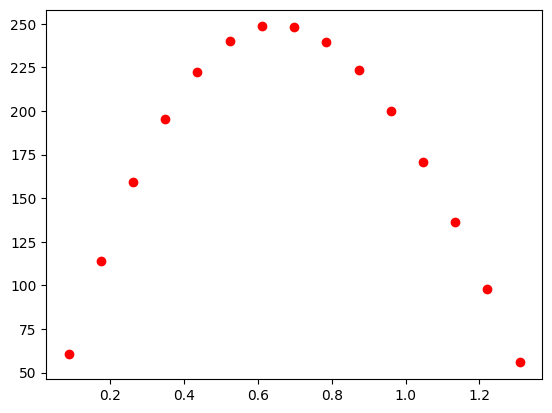

In [12]:
# Alcance maximo como funcion de theta
plt.plot(theta, Rmax,"ro" )




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy

In [44]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import lagrange

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


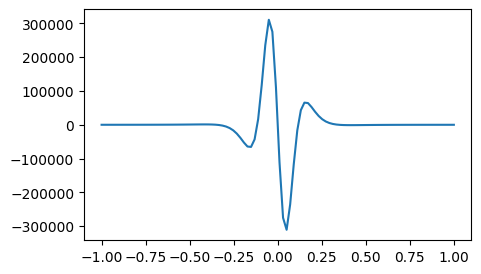

In [47]:
f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure(figsize=(5,3))
plt.plot(x_, fxn5(x_) )
plt.show()

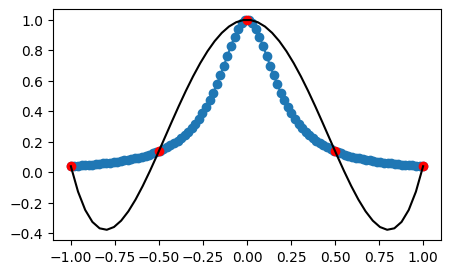

In [49]:
#Funcion
f_s = lambda x: 1/(1+25*x**2)
x=np.linspace(-1,1,100)

#Puntos a interpolar
N = 4
n=N+1
x_ = np.linspace(-1,1,n)

#Lagrange
P = lagrange(x_,f_s(x_))
xx=np.linspace(np.min(x_), np.max(x_))

#Grafica
plt.figure(figsize=(5,3))
plt.plot(x,f_s(x),"o-")
plt.plot(x_,f_s(x_),"ro")
plt.plot(xx, P(xx),"k-")

In [55]:
def interpolation_lagrange(N):
  #Puntos a interpolar  
  n=N+1
  x_ = np.linspace(-1,1,n)

  #Lagrange
  P = lagrange(x_,f_s(x_))
  xx=np.linspace(np.min(x_), np.max(x_))
  return xx, P

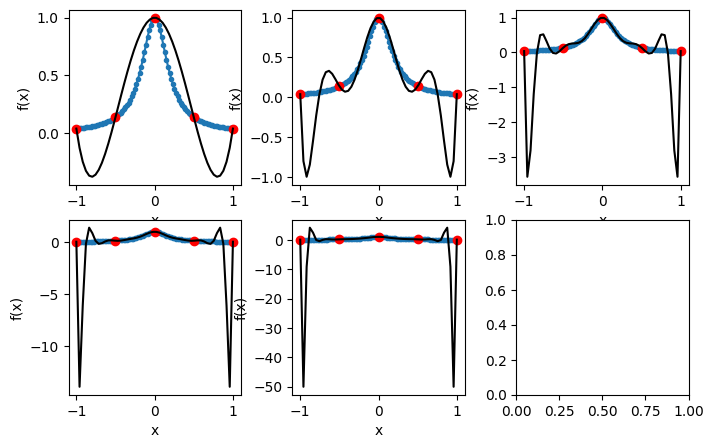

In [56]:
#Grafica
NN=[4, 8, 12, 16, 20]

i=0
fig, axs = plt.subplots(figsize=(8,5), nrows=2,ncols=3)
for n_ in NN:
  
  ax=axs.flatten()
  ax[i].plot(x,f_s(x),".-")
  ax[i].plot(x_,f_s(x_),"ro")
  N = n_
  xx, P = interpolation_lagrange(N)
  ax[i].plot(xx,P(xx),"k-")
  ax[i].set_xlabel("x")
  ax[i].set_ylabel("f(x)")
  i=i+1
fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.2)


# 3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [29]:
import scipy as sp

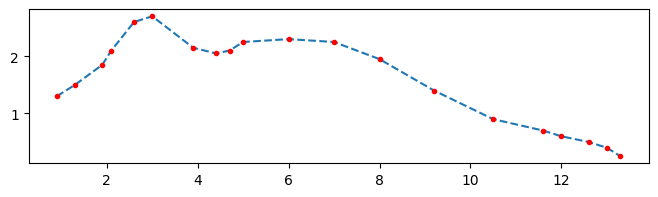

In [41]:
x = np.array([0.9, 1.3,  1.9, 2.1, 2.6, 3.0,  3.9,  4.4, 4.7,  5.0, 6.0,  7.0,  8.0, 9.2, 10.5, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4,  0.9,  0.7,  0.6,  0.5,  0.4, 0.25])

plt.figure(figsize=(8,2))
plt.plot(x,y,'--')
plt.plot(x,y,'r.');

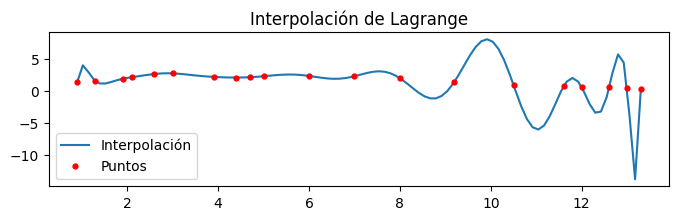

In [40]:
poly = sp.interpolate.lagrange(x,y)
x_=np.linspace(np.min(x), np.max(x),100)
plt.figure(figsize=(8,2))
plt.title('Interpolación de Lagrange')
plt.plot(x_,poly(x_),label='Interpolación')
plt.plot(x,y,'.',markersize=7,color='r',label='Puntos')
plt.legend();

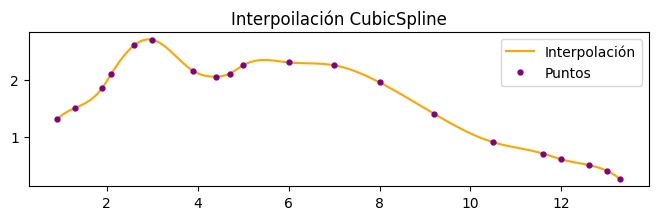

In [39]:
cubic = sp.interpolate.CubicSpline(x, y)
plt.figure(figsize=(8,2))
plt.title('Interpoilación CubicSpline')
plt.plot(x_,cubic(x_),color='orange', label='Interpolación')
plt.plot(x,y,'.',markersize=7,color='purple', label='Puntos')
plt.legend()

# 5.0 Ejercicios de Repaso

 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


e. Para los 100 puntos anteriores, emplee el metodo de interpolación de lagrange y cubic-spline. Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los metodos. ¿Que puede concluir de los metodos?